# Business Sales Analysis Project

## This project aims to analyze sales performance, profitability drivers, and loss patterns across product categories, regions, and sales channels to identify improvement opportunities.

### Importing all necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Settings White Grid and Graph Figuare Size

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

### Reading CSV File of Sales Data (Downloaded from Kaggle)
### Also Displaying First 5 rows, Checking for Data Columns and Summary Statistics.

In [3]:
df=pd.read_csv("F:\\Projects\\Business analysis\\sales_data.csv")
print(df.head(5))
df.info()
df.describe()

   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  03/02/2023       Bob  North       5053.97             18   
1        1093  21/04/2023       Bob   West       4384.02             17   
2        1015  21/09/2023     David  South       4631.23             30   
3        1072  24/08/2023       Bob  South       2167.94             39   
4        1061  24/03/2023   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  Unnamed: 14  
0           Cash        Online            North-Bob          NaN  


,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Unnamed: 14
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,0.0
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239,NaN
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720,NaN
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000,NaN
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000,NaN
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000,NaN
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000,NaN
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000,NaN


### Checking For any Missing Values

In [4]:
df.isnull().sum()

Product_ID                 0
Sale_Date                  0
Sales_Rep                  0
Region                     0
Sales_Amount               0
Quantity_Sold              0
Product_Category           0
Unit_Cost                  0
Unit_Price                 0
Customer_Type              0
Discount                   0
Payment_Method             0
Sales_Channel              0
Region_and_Sales_Rep       0
Unnamed: 14             1000
dtype: int64

There is no Missing Values in any variable.

## Assumptions

- Unit_Price is assumed to be the listed selling price before discount.
- Discount is assumed to be applied uniformly across the total quantity sold.
- Operational costs other than unit cost (e.g., logistics, marketing) are not included.
- Profit is calculated solely based on sales and unit cost.


### Calculating varaibles to get meaningful results
- Sales_Amount was not used for revenue calculations as it does not consistently reflect unit pricing and applied discounts; therefore, total revenue was recomputed using Unit_Price, Quantity_Sold, and Discount.”

In [5]:
df['total_revenue']= df['Unit_Price']*df['Quantity_Sold']*(1-df['Discount'])
df['total_cost']= df['Unit_Cost']*df['Quantity_Sold']
df['Profit']=df['total_revenue']-df['total_cost']
df['Profit_margin']=df['Profit']/df['total_revenue']

### Creation of some month varaibles for analysis

In [6]:
df['Sale_Date']=pd.to_datetime(df['Sale_Date'], dayfirst=True)
df['Month']=df['Sale_Date'].dt.month
df['Month_Name']=df['Sale_Date'].dt.month_name()

### Displaying Total Revenue and Profit

In [7]:
print(df['total_revenue'].sum())
print(df['Profit'].sum())

59686173.283700004
-4155920.3563


Here we can see negative profit which indicates loss.

### Checking Revenue for each Product Category 

In [8]:
df.groupby('Product_Category')["total_revenue"].sum().sort_values(ascending=True)

Product_Category
Food           1.280833e+07
Electronics    1.515323e+07
Furniture      1.536378e+07
Clothing       1.636084e+07
Name: total_revenue, dtype: float64

Here we can see clothing has the best revenue amoung product category which is followed by Furniture, Electronics and Food.

### Checking Profit across Different Region

In [9]:
df.groupby("Region")['Profit'].sum().sort_values(ascending=True)

Region
East    -1.224562e+06
West    -1.086588e+06
North   -9.766005e+05
South   -8.681700e+05
Name: Profit, dtype: float64

Here we can see negative profit(Loss) amoung different region which shows South region has Least Loss then other Regions.

### Checking Profit amoung Product Category, Region and Sales Channel

In [10]:
print(df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=True))
print(df.groupby('Region')['Profit'].sum().sort_values(ascending=True))
print(df.groupby('Sales_Channel')['Profit'].sum().sort_values(ascending=True))

Product_Category
Clothing      -1.212932e+06
Furniture     -1.187042e+06
Food          -9.124514e+05
Electronics   -8.434952e+05
Name: Profit, dtype: float64
Region
East    -1.224562e+06
West    -1.086588e+06
North   -9.766005e+05
South   -8.681700e+05
Name: Profit, dtype: float64
Sales_Channel
Online   -2.164673e+06
Retail   -1.991248e+06
Name: Profit, dtype: float64


##### Here we can see three results of Negative Profit(Loss):
1. In this we can see that Electronics has least loss then others
2. In this we can see that South Region has least loss then others
3. In this we can see that Retail has least loss then Online.

### Bar Chart for Total Revenue in Different Product Category

<function matplotlib.pyplot.show(close=None, block=None)>

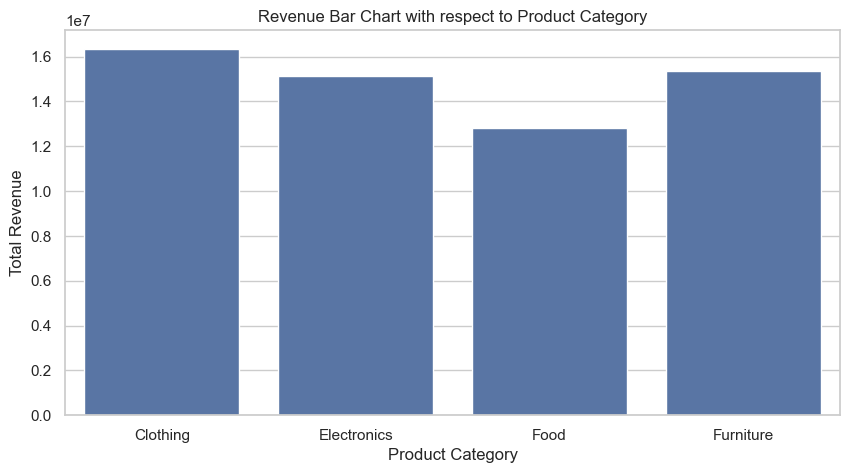

In [22]:
category_revenue=df.groupby('Product_Category')["total_revenue"].sum().reset_index()

sns.barplot(
    data=category_revenue,
    x="Product_Category",
    y="total_revenue"
)

plt.title("Revenue Bar Chart with respect to Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show

This Bar Chart Shows tbat clothing has the best revenue amoung product category which is followed by Furniture, Electronics and Food.

### Bar Chart of Profit amoung Different Product Category

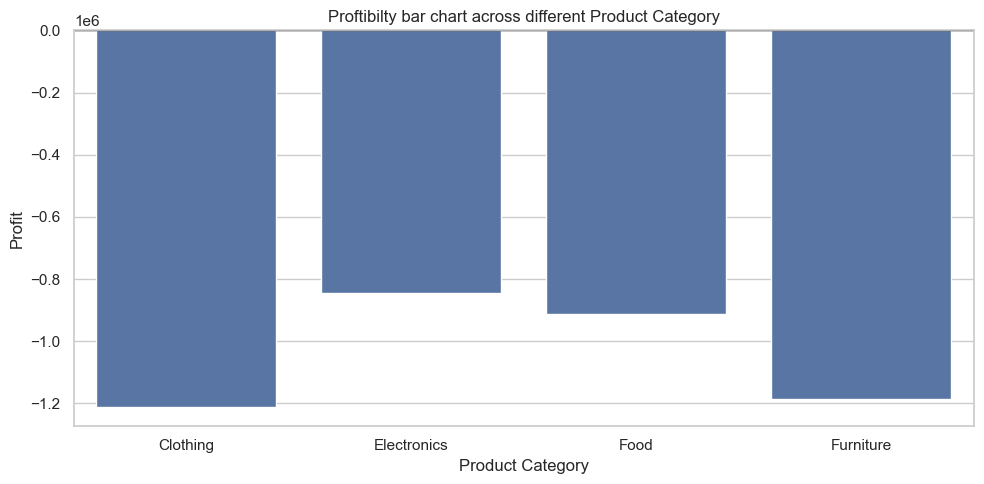

In [23]:
profitibilty=df.groupby("Product_Category")["Profit"].sum().reset_index()

sns.barplot(
    data=profitibilty,
    x="Product_Category",
    y="Profit"
)

plt.title("Proftibilty bar chart across different Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

This Bar chart that Electronics has least loss then others.

### Bar Chart of Profit amoung Different Region

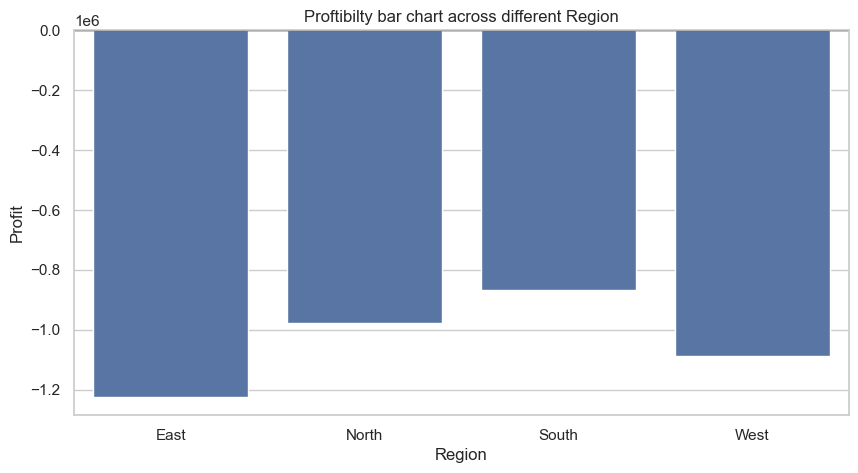

In [19]:
profitibilty=df.groupby("Region")["Profit"].sum().reset_index()

sns.barplot(
    data=profitibilty,
    x="Region",
    y="Profit"
)

plt.title("Proftibilty bar chart across different Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

##### This Bar Plot shows that South Region has least loss then others

### Bar Chart of Profit amoung Sales Channel

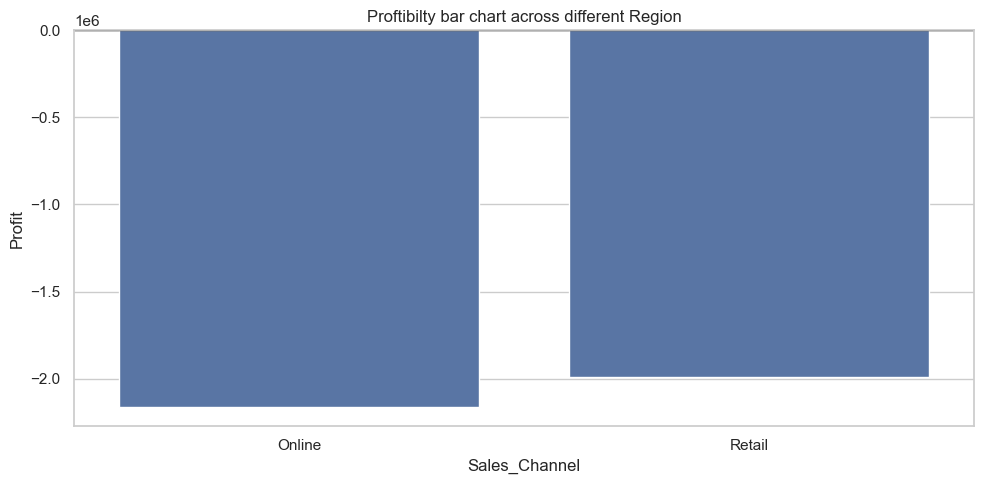

In [24]:
profitibilty=df.groupby("Sales_Channel")["Profit"].sum().reset_index()

sns.barplot(
    data=profitibilty,
    x="Sales_Channel",
    y="Profit"
)

plt.title("Proftibilty bar chart across different Region")
plt.xlabel("Sales_Channel")
plt.ylabel("Profit")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

This Bar Plot Shows that Retail has least loss then Online.

### Bar Chart For Revenue of Each Month

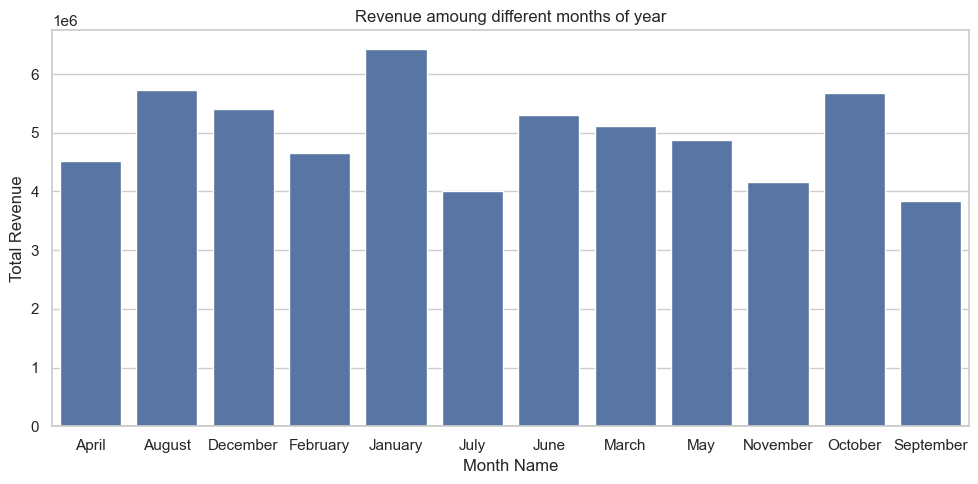

In [21]:
monthly=df.groupby("Month_Name")["total_revenue"].sum().reset_index()

sns.barplot(
    data=monthly,
    x="Month_Name",
    y="total_revenue"
)

plt.title("Revenue amoung different months of year")
plt.xlabel("Month Name")
plt.ylabel("Total Revenue")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

In this we can see that January made the higest Profit

### Scatter Plot for checking relationship between Discount and Profit

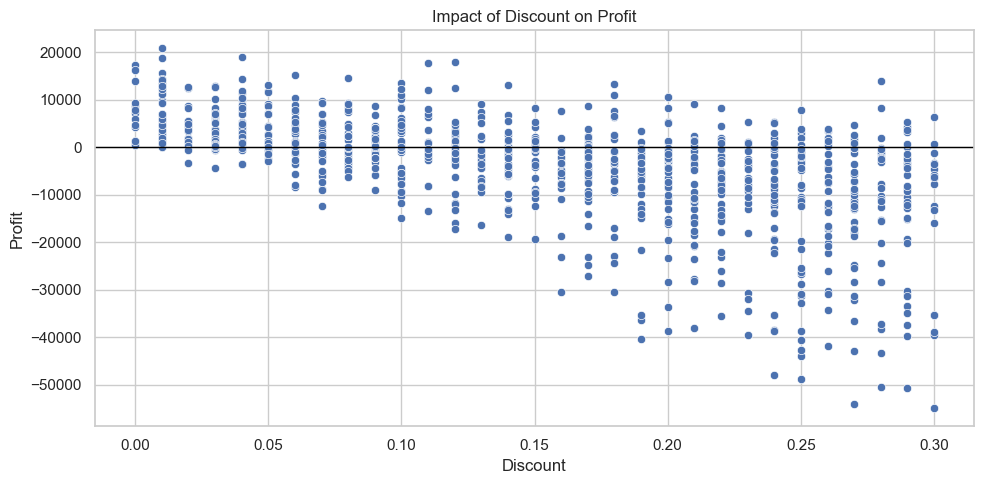

In [20]:
sns.scatterplot(
    data=df,
    x="Discount",
    y="Profit"
)

plt.title("Impact of Discount on Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

This Scatter Plot shows that higher Discount Leads to Higher Loss. There are many results that shows profit after Discount while the majority results shows Discount is leading to losses. This correlation indicates that increasing discounts does not drive profitability and instead amplifies losses, suggesting the absence of a discount optimization strategy.

### 🔑 Key Findings

- All product categories are operating at a loss, indicating systemic pricing or cost issues.
- Electronics shows the least loss among categories, suggesting relatively better cost control.
- Clothing and Furniture incur the highest losses, possibly due to aggressive discounting or high unit costs.
- Retail sales channel performs slightly better than Online, showing lower total losses.
- Higher discounts are strongly associated with increased losses, indicating ineffective discount strategies.


## Conclusion

This analysis revealed that the business is currently operating at a loss across all segments, primarily driven by pricing and discount strategies. While Electronics and Retail channels show relatively better performance, overall profitability requires immediate intervention through optimized pricing, controlled discounting, and cost management. Future predictive modeling and experimentation could further guide data-driven decision-making.


## Business Recommendations

- Revisit pricing strategies for Clothing and Furniture categories.
- Introduce minimum price thresholds to prevent selling near or below unit cost.
- Optimize discount policies by setting upper discount limits.
- Focus on improving online channel efficiency or cost structure.
- Conduct A/B testing on discount levels to identify profit-maximizing ranges.


## Future Work

- Build a predictive model to estimate profit based on pricing and discount inputs.
- Perform customer segmentation to identify high-value customers.
- Integrate time-series analysis to detect seasonal trends.
- Deploy the analysis via a dashboard or API.
